### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# White Wine Quality
## Random Forest Regression, Raw, Outliers Removed
#### Audrey Hughes Rager
#### February 24, 2021




## Import Python Packages

In [70]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

### Import data

In [71]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
#whitedf = pd.read_csv('whitewinebalanced.csv',sep=";")
df = pd.read_csv('whitewinebalanced_outliersremoved.csv',sep=",")


### Check for null values

In [72]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values.

### Inspect data

In [73]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.1              0.22         0.25           12.10      0.035   
1            6.7              0.25         0.31            1.35      0.061   
2            7.8              0.30         0.37            1.30      0.051   
3            7.6              0.39         0.22            2.80      0.036   
4            6.2              0.28         0.43           13.00      0.039   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 54.0                 135.0  0.99481  3.21       0.40   
1                 30.5                 218.0  0.99388  3.16       0.53   
2                 16.0                  96.0  0.99410  3.32       0.62   
3                 19.0                 113.0  0.99260  3.03       0.29   
4                 64.0                 233.0  0.99745  3.08       0.38   

   alcohol  quality  
0     10.7        5  
1      9.5        5  
2     10.0        5  
3     10.2        5  
4      8.9        5

### Remove Outliers

In [74]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    3500.000000       3500.000000  3500.000000     3500.000000   
mean        6.877167          0.281883     0.335521        5.476110   
std         0.586609          0.064576     0.067381        3.950842   
min         4.900000          0.080000     0.110000        0.600000   
25%         6.500000          0.240000     0.293333        2.400000   
50%         6.900000          0.286667     0.333333        4.500000   
75%         7.200000          0.320000     0.380000        7.500000   
max         8.700000          0.485000     0.540000       20.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  3500.000000          3500.000000           3500.000000  3500.000000   
mean      0.039305            30.523000            125.407238     0.993037   
std       0.009796            13.441219             34.472706     0.002555   
min       0.016000             2.000000             19.000000     0.987110   
25%       0.032000            20.333333            105.666667     0.990890   
50%       0.039667            29.333333            120.000000     0.992833   
75%       0.046000            38.333333            143.000000     0.994552   
max       0.070000            78.000000            253.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  3500.000000  3500.000000  3500.000000  3500.000000  
mean      3.217385     0.468823    11.051463     6.000000  
std       0.123043     0.080517     1.206306     2.000286  
min       2.830000     0.250000     8.400000     3.000000  
25%       3.136667     0.420000    10.129167     4.000000  
50%       3.220000     0.463333    11.000000     6.000000  
75%       3.310000     0.503333    12.166667     8.000000  
max       3.570000     0.760000    14.200000     9.000000

## EDA

### Histograms

In [75]:

df.groupby(['quality']).size()

quality
3    500
4    500
5    500
6    500
7    500
8    500
9    500
dtype: int64

In [76]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
for i in qual_list:
    proportion = quant_list[j]/ n
    print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    #print(j)
    j += 1
    

quality 3; n = 20; proportion = 0.004083299305839118
quality 4; n = 163; proportion = 0.03327888934258881
quality 5; n = 1457; proportion = 0.2974683544303797
quality 6; n = 2198; proportion = 0.44875459371171905
quality 7; n = 880; proportion = 0.17966516945692118
quality 8; n = 175; proportion = 0.03572886892609228
quality 9; n = 5; proportion = 0.0010208248264597796


In [77]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
sum = 0
for i in qual_list:
    proportion = round(quant_list[j]/ n,5)
    #print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    print(str(proportion))
    j += 1
    sum += proportion
#print(sum)


0.00408
0.03328
0.29747
0.44875
0.17967
0.03573
0.00102


In [78]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
sum = 0
for i in qual_list:
    proportion = round(quant_list[j]/ n,5)*100
    #print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    print(str(proportion))
    j += 1
    sum += proportion
print(sum)


0.40800000000000003
3.328
29.747
44.875
17.967
3.573
0.10200000000000001
100.0


Wine Quality


<AxesSubplot:xlabel='quality', ylabel='count'>

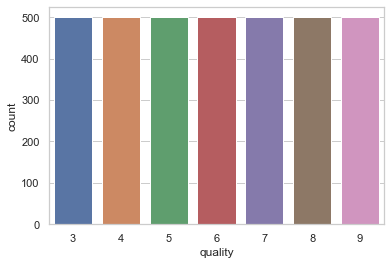

In [79]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df)

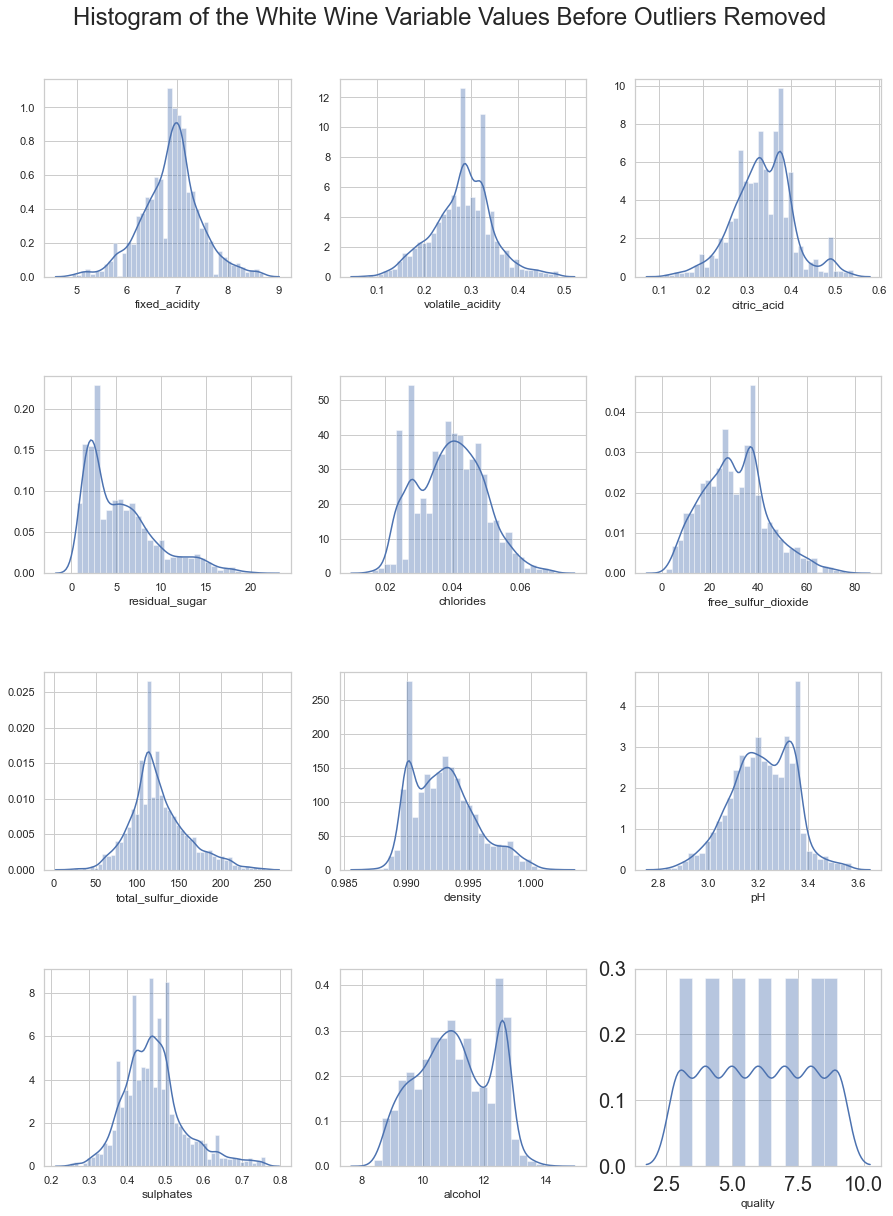

In [80]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values Before Outliers Removed")



### Boxplots

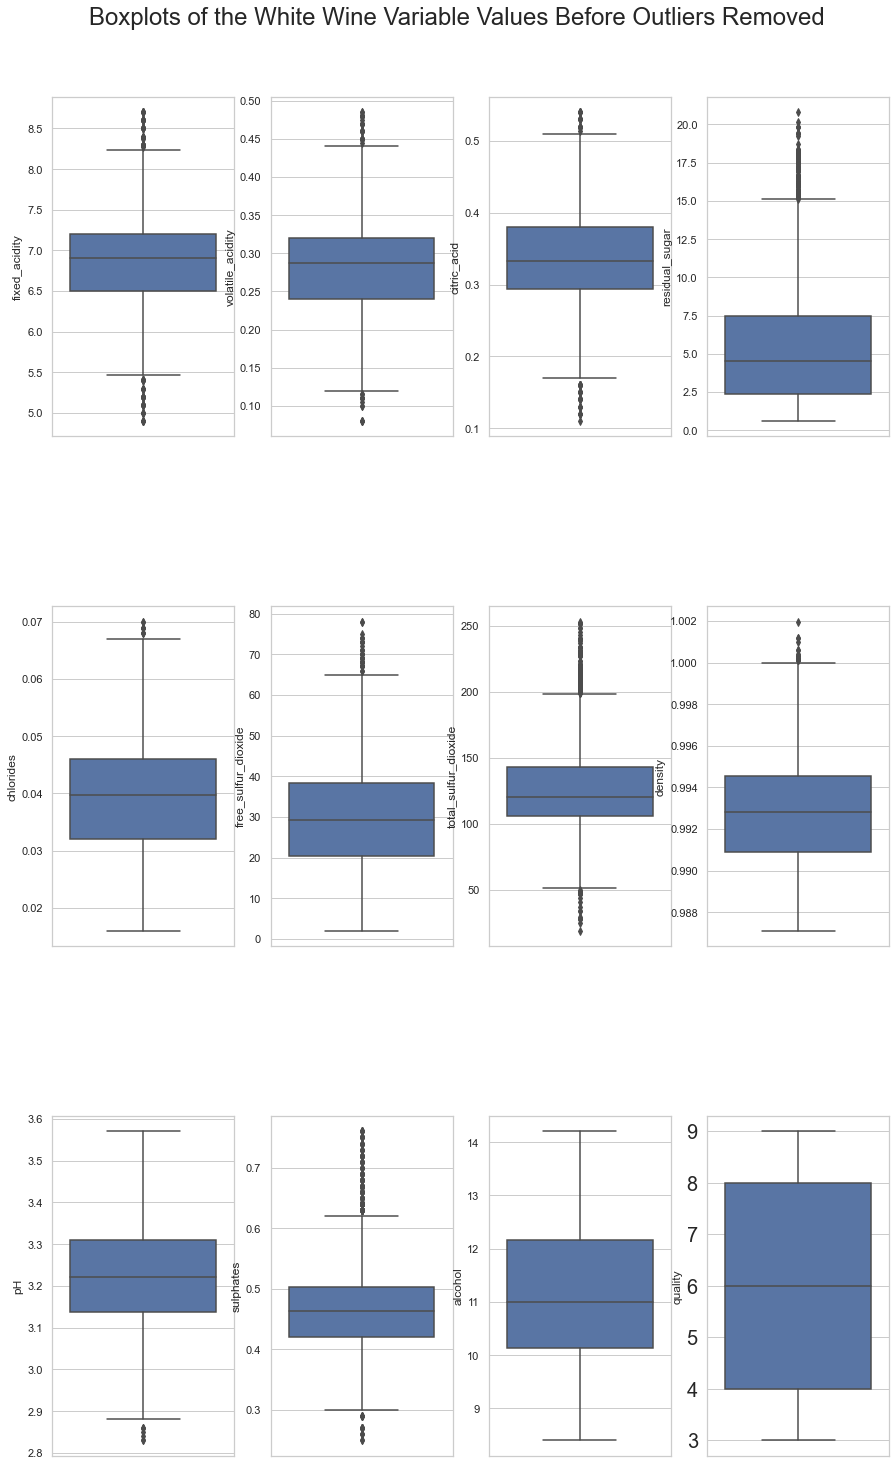

In [82]:
#Boxplots
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")



### Computing Skewness

In [84]:
plot_columns = ['fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density', 'pH', 'sulphates','alcohol','quality']

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skew")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness')

skewness_check(df[plot_columns])

White Wine Skewness


Column  Skewness   Skew Category
0          fixed_acidity -0.088094      Light Skew
1       volatile_acidity -0.010983      Light Skew
2            citric_acid  0.015746      Light Skew
3         residual_sugar  1.131398  Heavily Skewed
4              chlorides  0.160416      Light Skew
5    free_sulfur_dioxide  0.416525      Light Skew
6   total_sulfur_dioxide  0.655541  Heavily Skewed
7                density  0.608946  Heavily Skewed
8                     pH -0.185430      Light Skew
9              sulphates  0.809695  Heavily Skewed
10               alcohol -0.057629      Light Skew
11               quality  0.000000      Light Skew

#### Observations regarding White Wine variables

<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.


</ul>

 

### Correlation Matrices
#### Spearman

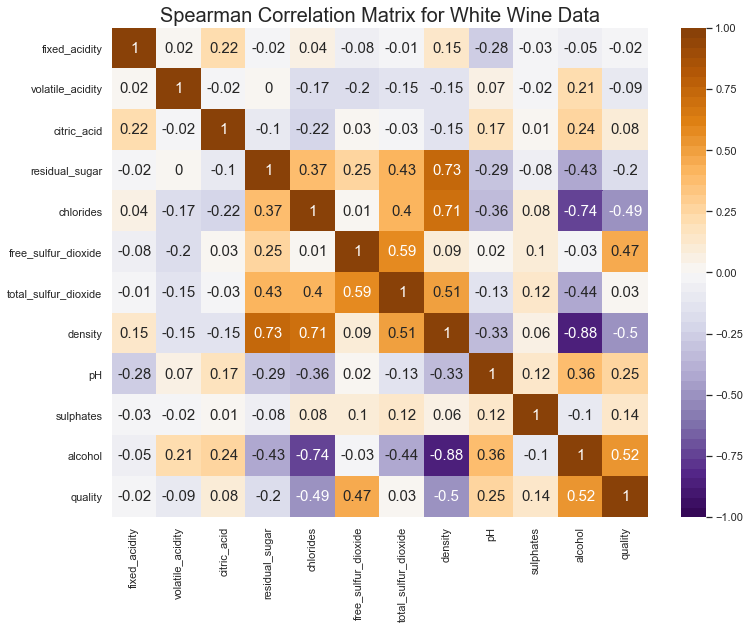

In [85]:
def confusion_matrix_plot(data, title = "Spearman Correlation Matrix for Wine Data Before Outliers Removed", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Spearman Correlation Matrix for White Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineSpearmanBOD.png")





In [86]:
print("Spearman")
df.corr(method ="spearman")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.519548
free_sulfur_dioxide     0.472679
pH                      0.249767
sulphates               0.136819
citric_acid             0.084503
total_sulfur_dioxide    0.032101
fixed_acidity          -0.019109
volatile_acidity       -0.094679
residual_sugar         -0.199225
chlorides              -0.487720
density                -0.496826
Name: quality, dtype: float64

#### Pearson's

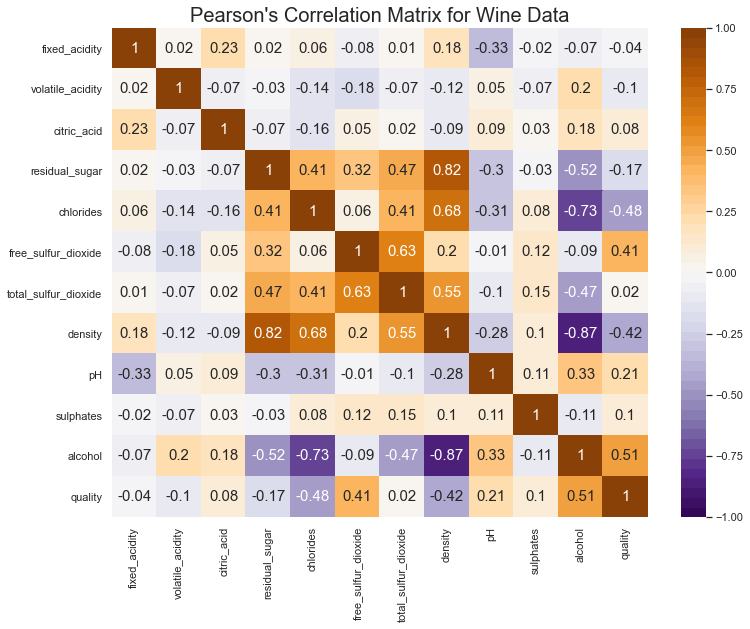

In [87]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [88]:
print("Spearman")
df.corr(method ="pearson")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.513274
free_sulfur_dioxide     0.405185
pH                      0.209210
sulphates               0.101643
citric_acid             0.079404
total_sulfur_dioxide    0.024277
fixed_acidity          -0.039859
volatile_acidity       -0.103349
residual_sugar         -0.170180
density                -0.421864
chlorides              -0.477054
Name: quality, dtype: float64

#### Kendall

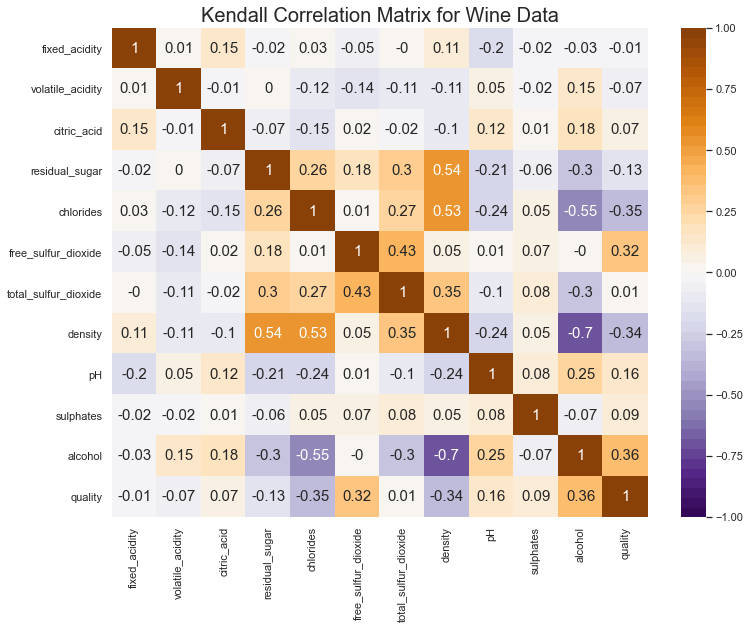

In [89]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [90]:
print("Kendall")
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

Kendall


quality                 1.000000
alcohol                 0.357212
free_sulfur_dioxide     0.322797
pH                      0.164834
sulphates               0.093263
citric_acid             0.068557
total_sulfur_dioxide    0.013504
fixed_acidity          -0.010284
volatile_acidity       -0.066772
residual_sugar         -0.133792
density                -0.342058
chlorides              -0.353408
Name: quality, dtype: float64

### Scatterplots of Predictors

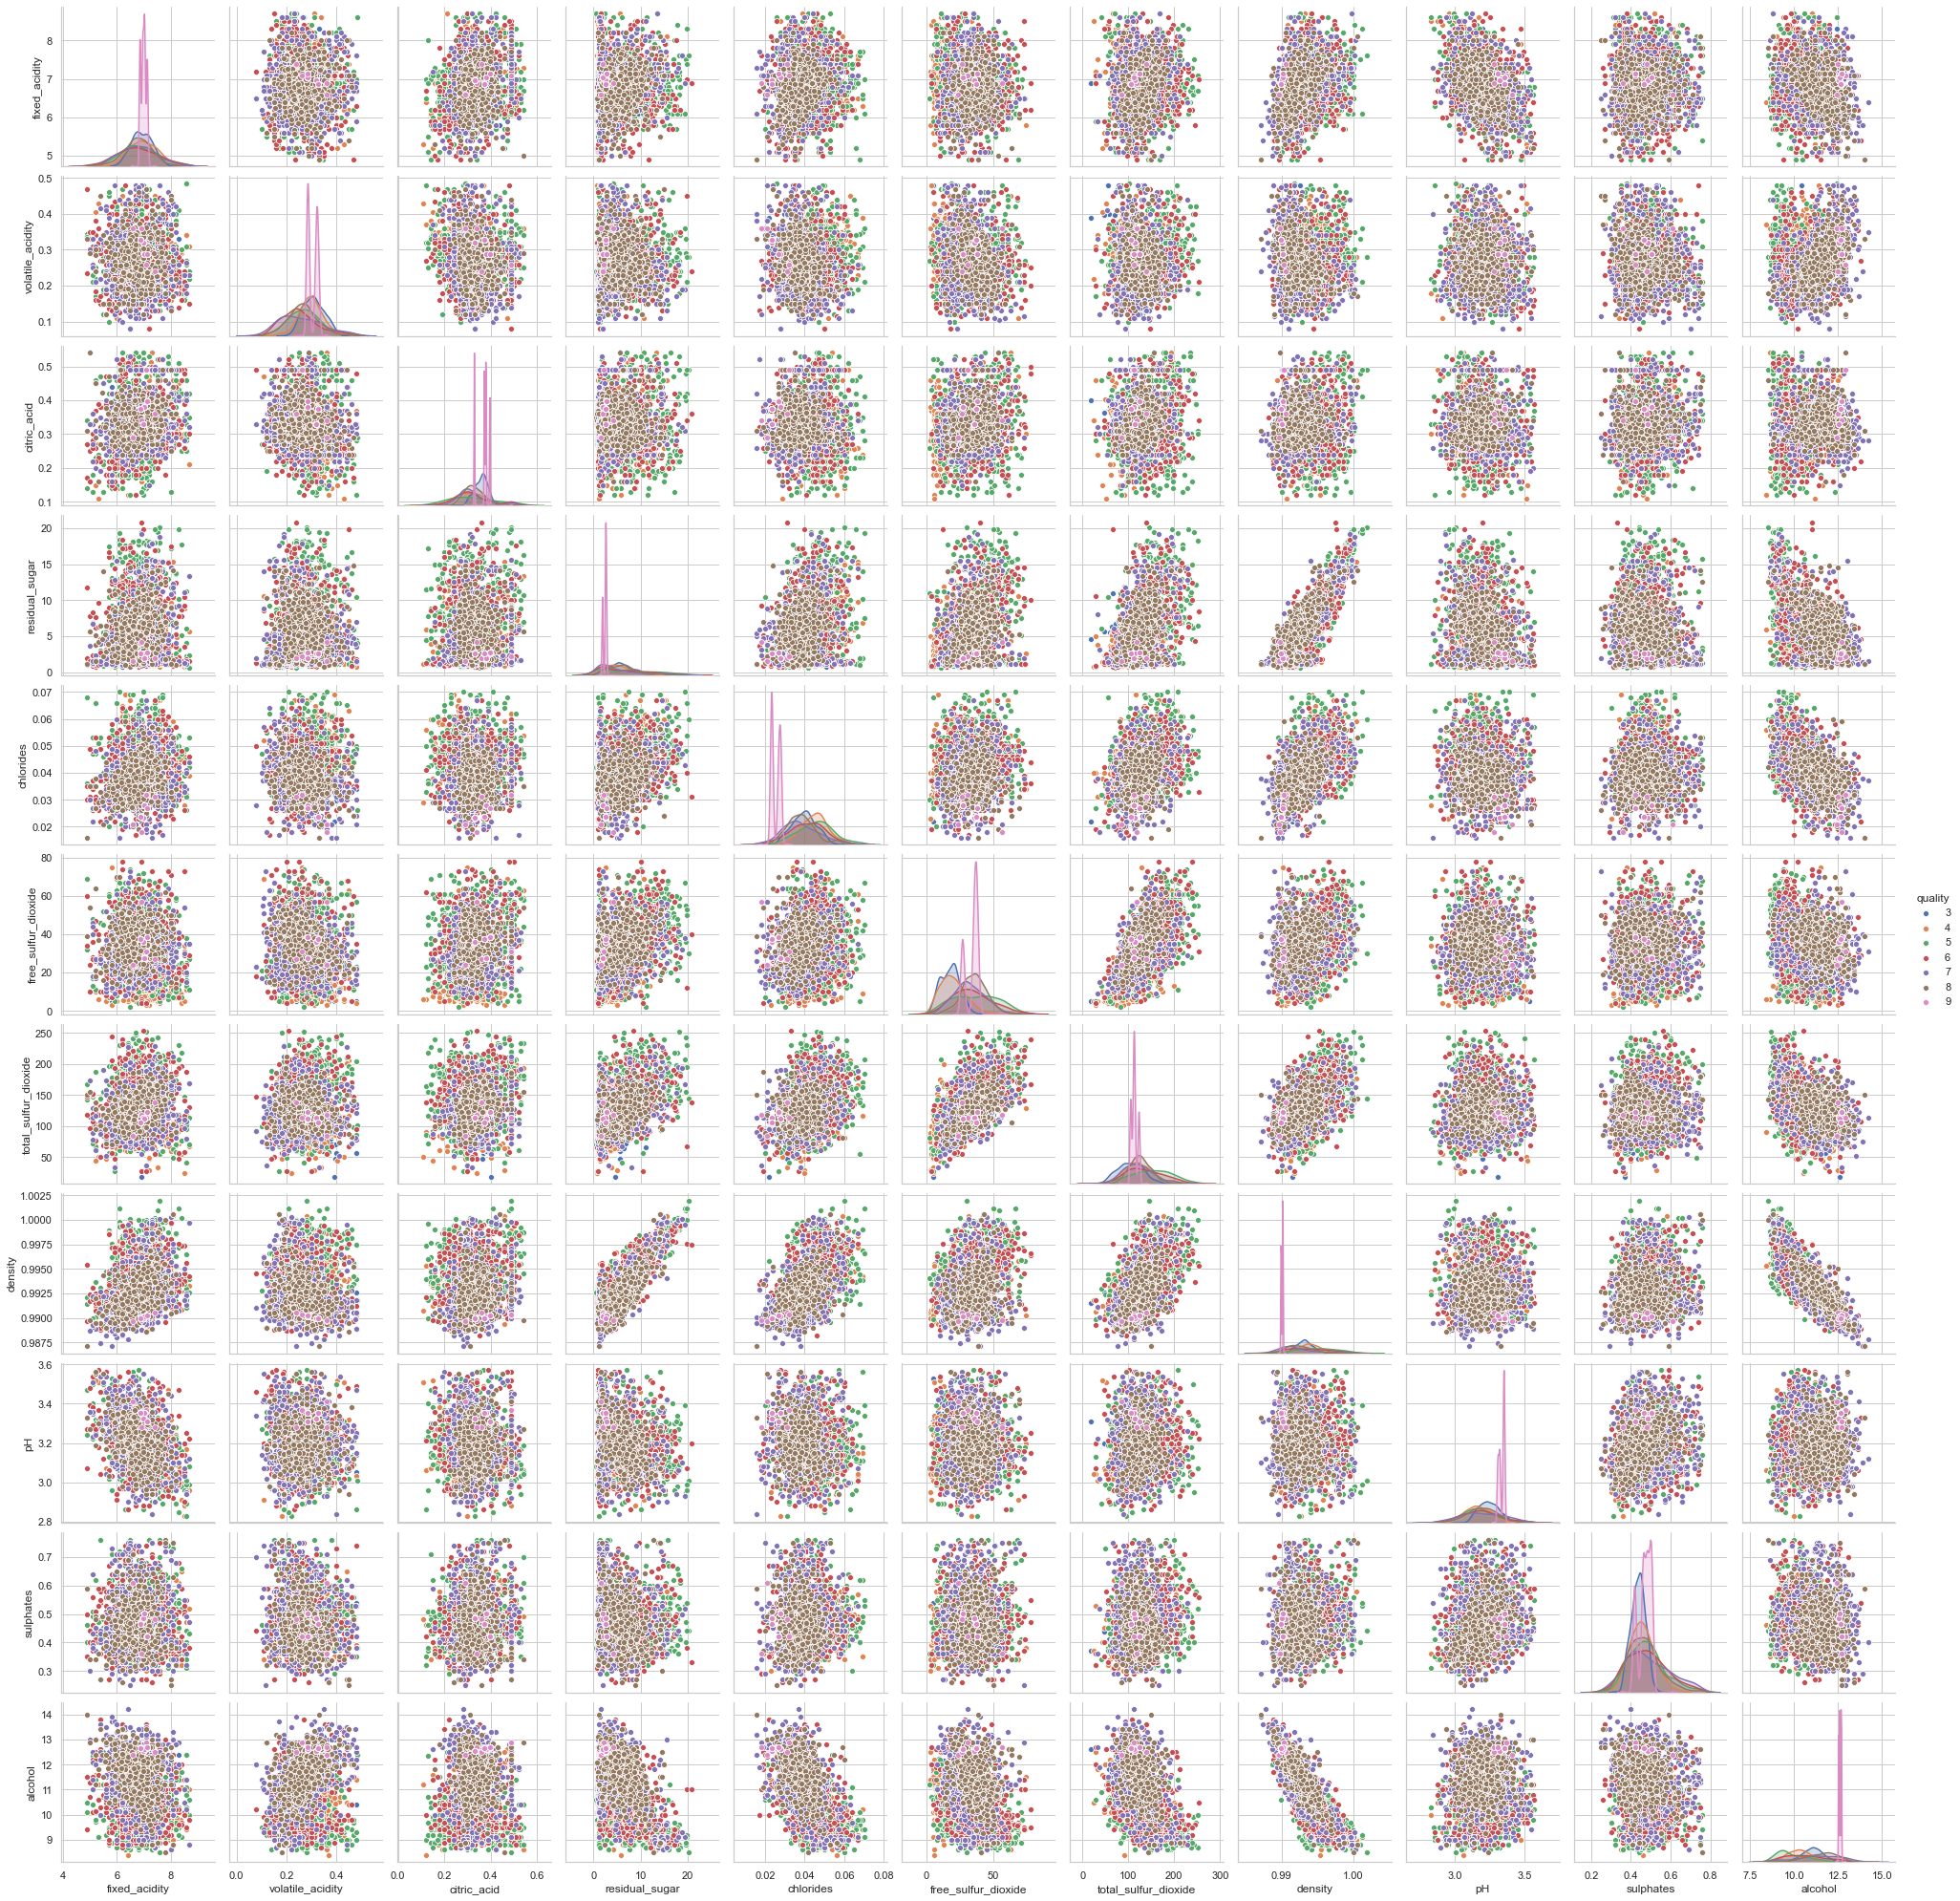

In [91]:
sns.pairplot(df,hue='quality')

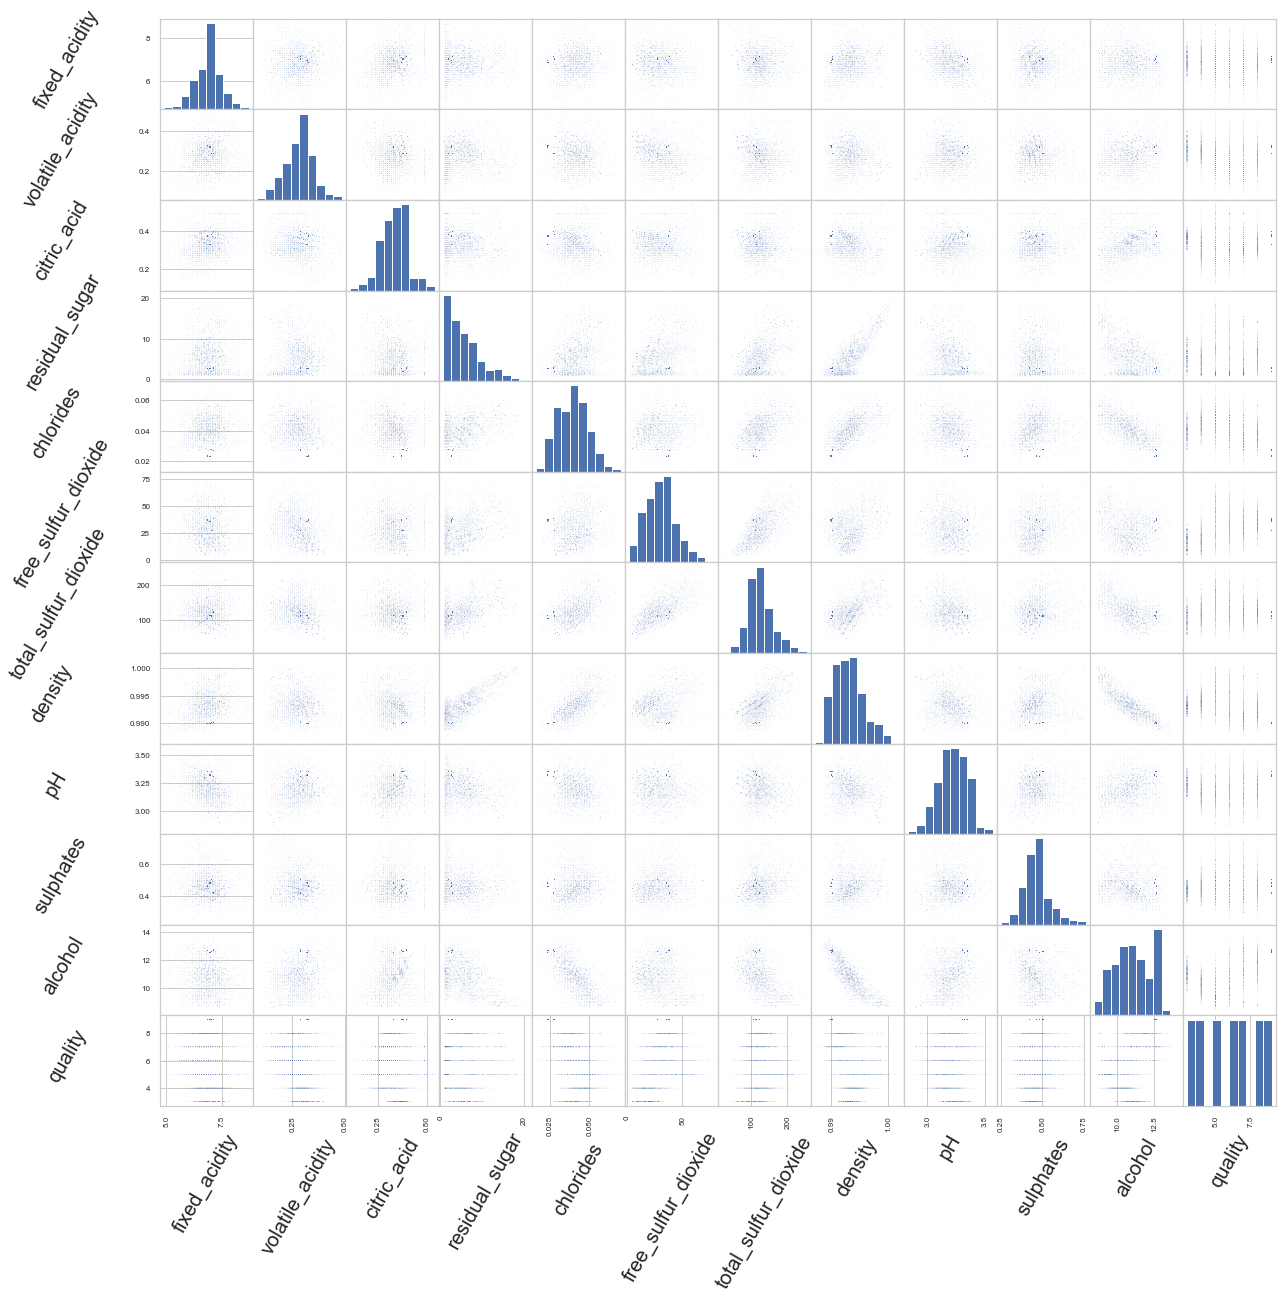

In [92]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    

<h3>1. Alcohol</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol Percent by White Wine Quality Box Plots')]

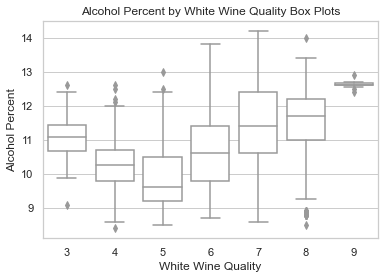

In [93]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>2. Density</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Density by White Wine Quality Box Plots')]

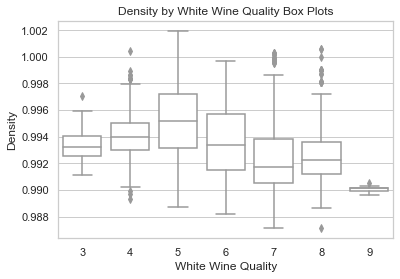

In [94]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>3. Chlorides</h3>    

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Chlorides'),
 Text(0.5, 1.0, 'Chlorides by White Wine Quality Box Plots')]

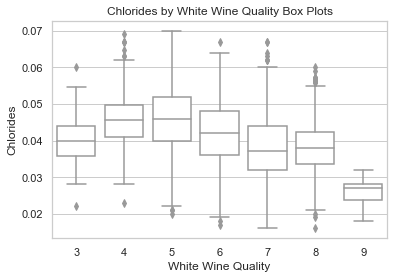

In [95]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>4. Volatile Acidity</h3>      

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 1.0, 'Volatile Acidity by White Wine Quality Box Plots')]

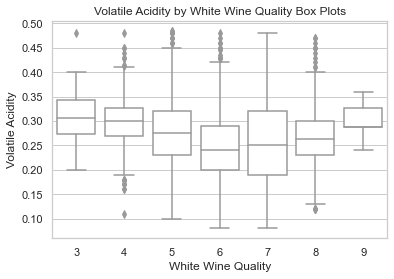

In [96]:
#Quality by Volatile Acidity


myAttribute = 'volatile_acidity'
myYLabel = 'Volatile Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>5. Citric Acid</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid by White Wine Quality Box Plots')]

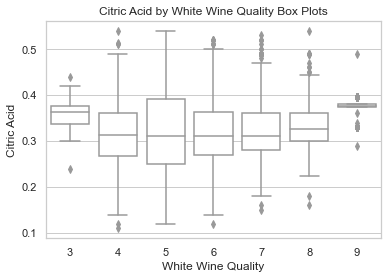

In [97]:
#Quality by Citric Acid

myAttribute = 'citric_acid'
myYLabel = 'Citric Acid'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>6. Fixed Acidity</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity by White Wine Quality Box Plots')]

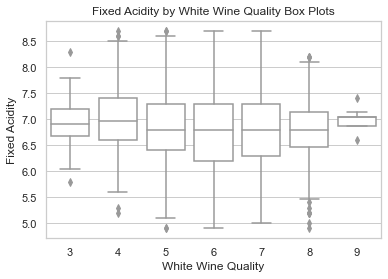

In [98]:
#Quality by Fixed Acidity

myAttribute = 'fixed_acidity'
myYLabel = 'Fixed Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>7. Free Sulfur Dioxide</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Free Sulfur Dioxide'),
 Text(0.5, 1.0, 'Free Sulfur Dioxide by White Wine Quality Box Plots')]

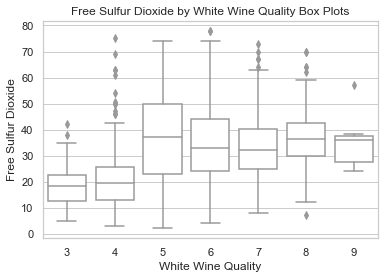

In [99]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free_sulfur_dioxide'
myYLabel = 'Free Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>8. Total Sulfur Dioxide</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Total Sulfur Dioxide'),
 Text(0.5, 1.0, 'Total Sulfur Dioxide by White Wine Quality Box Plots')]

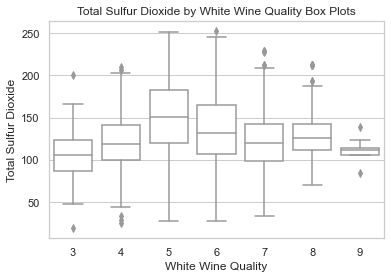

In [100]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total_sulfur_dioxide'
myYLabel = 'Total Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>9. pH</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH by White Wine Quality Box Plots')]

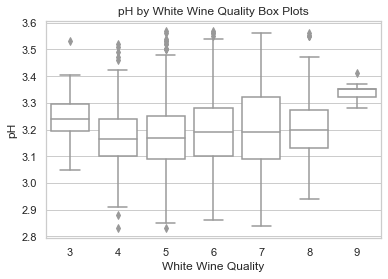

In [101]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>10. Sulphates</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates by White Wine Quality Box Plots')]

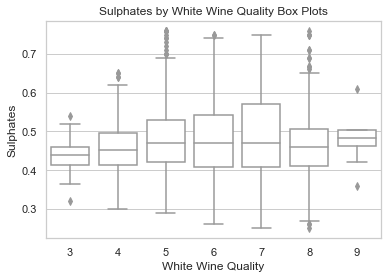

In [102]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>11. Residual Sugar</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Residual sugar'),
 Text(0.5, 1.0, 'Residual sugar by White Wine Quality Box Plots')]

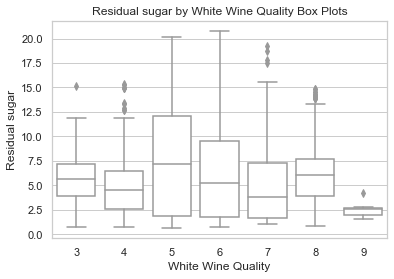

In [103]:
#Quality by Residual Sugar

myAttribute = 'residual_sugar'
myYLabel = 'Residual sugar'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


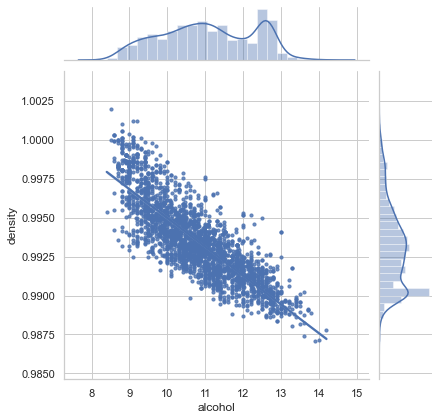

In [104]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


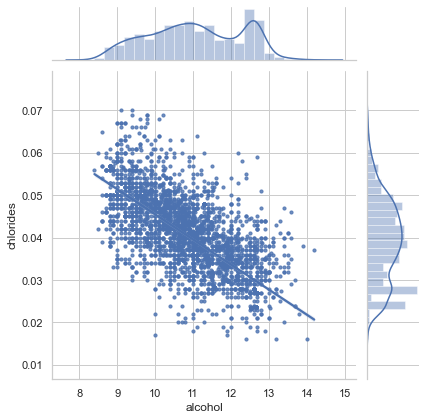

In [105]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

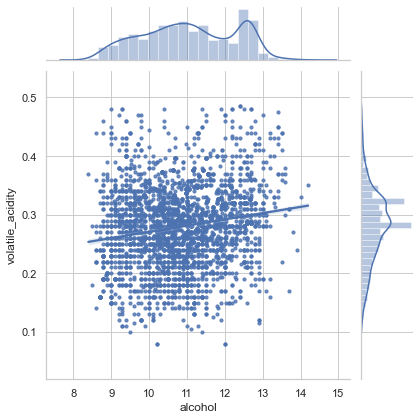

In [106]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile_acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

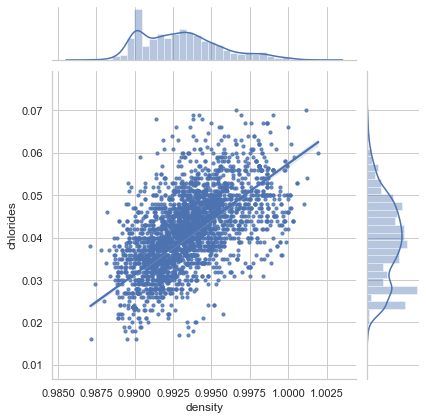

In [107]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

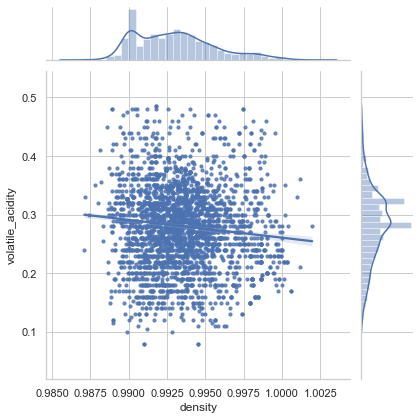

In [108]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile_acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

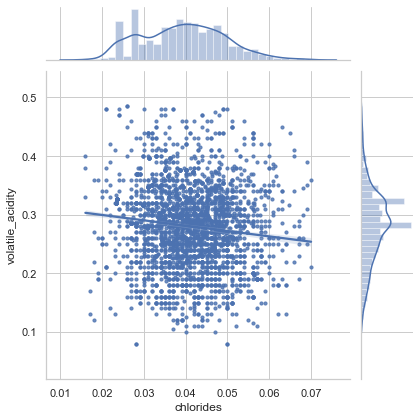

In [109]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile_acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

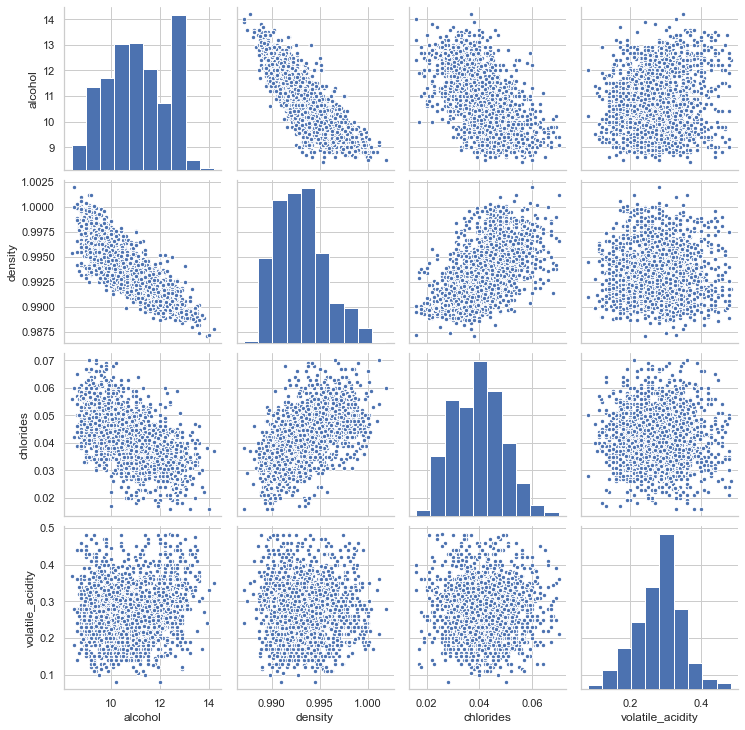

In [110]:

data = df[['alcohol', 'density', 'chlorides', 'volatile_acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

## Random Forest Regressor
### Import packages for analysis

In [111]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

### Train-Test-Split


In [112]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [114]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



### Instantiate the Random Forest Regressor

In [115]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

### Fit the Model to the Training Data

In [116]:
rfrModel = rfr.fit(X_train,y_train)

### Predict Using Test Data

In [117]:
y_pred = rfrModel.predict(X_test)

In [118]:
print(y_pred)

[3.35200909 4.2172395  5.66687721 3.08969214 4.55831005 4.13867915
 3.68518776 7.72828677 7.35597722 4.7371606  3.94001852 7.63884275
 8.87084261 5.93727792 7.28278456 6.2371983  6.45405871 5.01413397
 8.55663229 6.39653936 5.49509648 3.35200909 5.7883908  3.90383454
 6.47132909 6.04411142 6.35103243 6.85332443 3.14954999 8.62962685
 8.87084261 4.0070964  5.91631265 7.10448036 8.87084261 8.55663229
 4.6717658  5.85544019 6.45819648 4.72867666 5.16189932 8.55663229
 5.71399686 3.83309847 4.82564968 4.28034406 3.19567867 5.20259469
 6.51231564 4.65579767 5.84041982 5.06683548 7.32015524 8.55663229
 5.23831868 6.54105867 5.56052175 5.80967746 4.68466528 3.76667029
 8.55663229 8.37404856 5.47163071 7.18328219 4.40463258 8.91065258
 4.5843166  4.54146037 7.13930199 6.44018725 7.42154895 5.5487982
 4.62967596 7.23292702 5.93529074 4.67539469 8.87084261 6.34264183
 8.55663229 3.30377544 8.87084261 8.87084261 8.55663229 8.91065258
 7.07815584 7.4896892  7.31294108 7.46207791 5.87862811 5.11351

In [119]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[6.7210696]


In [120]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[6.7210696]


### Evaluate the Model

In [121]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [122]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.7271
Mean Squared Error (MSE): 0.9629


In [123]:
importance = rfrModel.feature_importances_
importance

array([0.00649151, 0.07683671, 0.02273749, 0.00838014, 0.03798628,
       0.22553003, 0.00340817, 0.0177199 , 0.03141848, 0.00803498,
       0.5614563 ])

In [124]:
columns = X.columns

In [125]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed_acidity           0.006492
volatile_acidity        0.076837
citric_acid             0.022737
residual_sugar          0.008380
chlorides               0.037986
free_sulfur_dioxide     0.225530
total_sulfur_dioxide    0.003408
density                 0.017720
pH                      0.031418
sulphates               0.008035
alcohol                 0.561456
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)')]

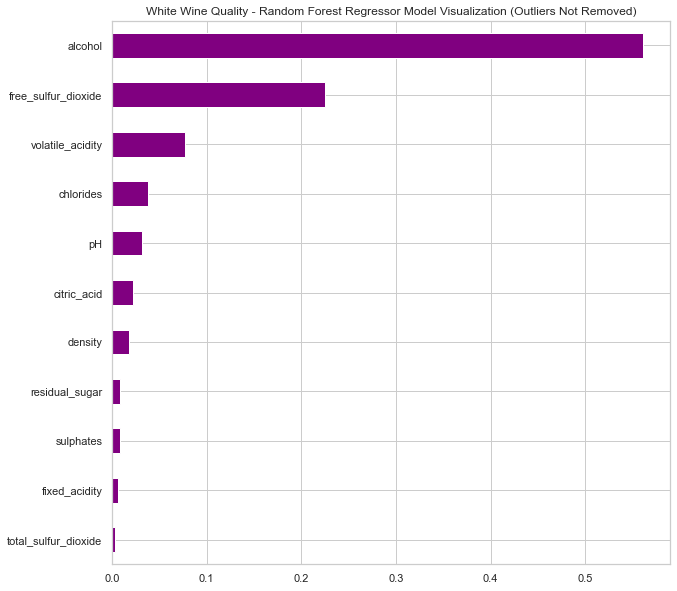

In [126]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)")]

Balanced, Outliers Removed


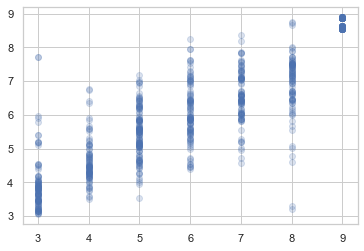

In [129]:
#Plot actual vs. predicted.
print("Balanced, Outliers Removed")
plt.scatter(y_test,y_pred,alpha=0.2)